#📌 Extracción

In [25]:
# 📌 Extracción
import pandas as pd
import json

# Cargar el archivo JSON
with open("TelecomX_Data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Normalizar datos anidados a un DataFrame plano
df = pd.json_normalize(data)

# Vista rápida
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [26]:
# 🔧 Transformación
# Renombrar columnas para simplificar
df.columns = [col.replace("customer.", "")
                .replace("phone.", "")
                .replace("internet.", "")
                .replace("account.", "")
                .replace("Charges.", "")
             for col in df.columns]

# Convertir columnas numéricas
df["Monthly"] = pd.to_numeric(df["Monthly"], errors="coerce")
df["Total"] = pd.to_numeric(df["Total"], errors="coerce")

# Manejo de valores faltantes en 'Churn' (vacíos)
df["Churn"] = df["Churn"].replace("", pd.NA)

# Eliminar filas sin valor en Churn
df = df.dropna(subset=["Churn"])

# Crear columna de gasto promedio mensual
df["AvgChargesPerMonth"] = df.apply(lambda x: x["Total"]/x["tenure"] if x["tenure"]>0 else 0, axis=1)

# Confirmar limpieza
print("Valores nulos por columna:")
print(df.isnull().sum())

df.head()


Valores nulos por columna:
customerID             0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Monthly                0
Total                 11
AvgChargesPerMonth     0
dtype: int64


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,AvgChargesPerMonth
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,65.922222
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,60.266667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,70.212500
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,95.219231
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,89.133333


#📊 Carga y análisis


📌 Métricas descriptivas:
       SeniorCitizen       tenure      Monthly        Total  \
count    7043.000000  7043.000000  7043.000000  7032.000000   
mean        0.162147    32.371149    64.761692  2283.300441   
std         0.368612    24.559481    30.090047  2266.771362   
min         0.000000     0.000000    18.250000    18.800000   
25%         0.000000     9.000000    35.500000   401.450000   
50%         0.000000    29.000000    70.350000  1397.475000   
75%         0.000000    55.000000    89.850000  3794.737500   
max         1.000000    72.000000   118.750000  8684.800000   

       AvgChargesPerMonth  
count         7043.000000  
mean            64.698218  
std             30.270670  
min              0.000000  
25%             35.649000  
50%             70.300000  
75%             90.174158  
max            121.400000  


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_5512\2539275387.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


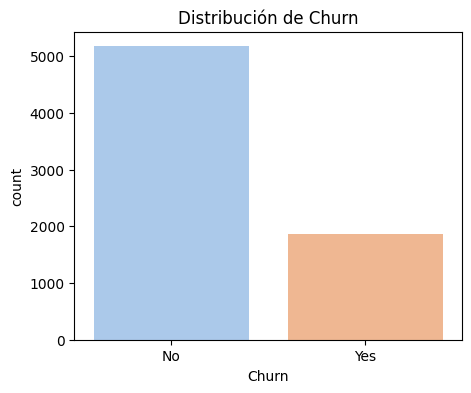

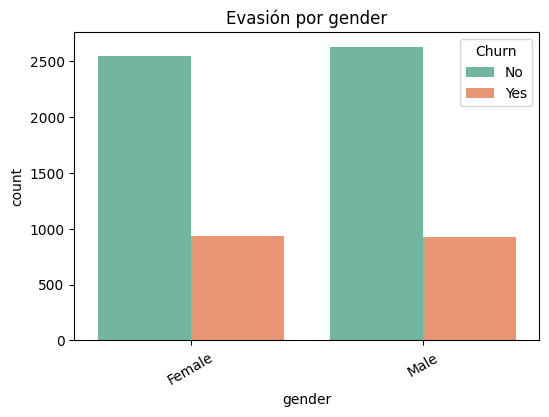

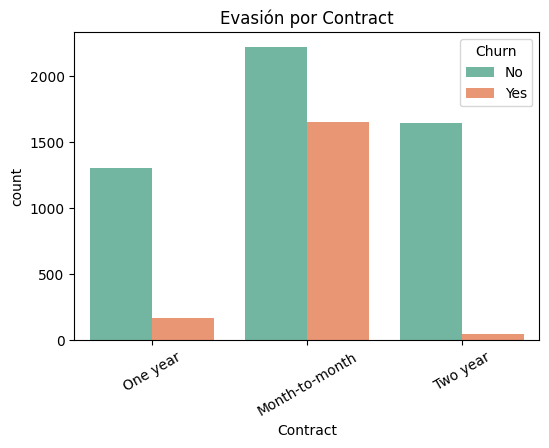

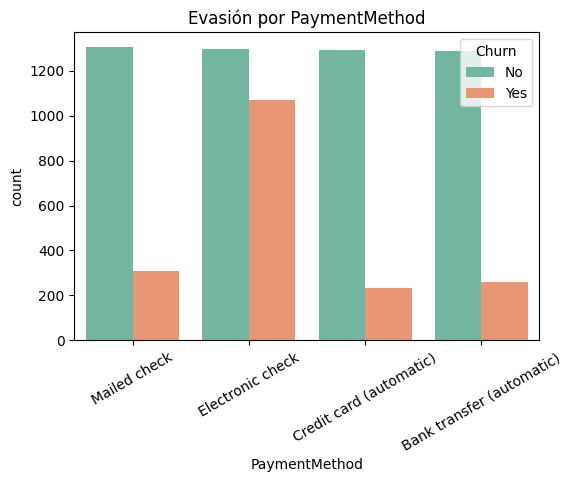

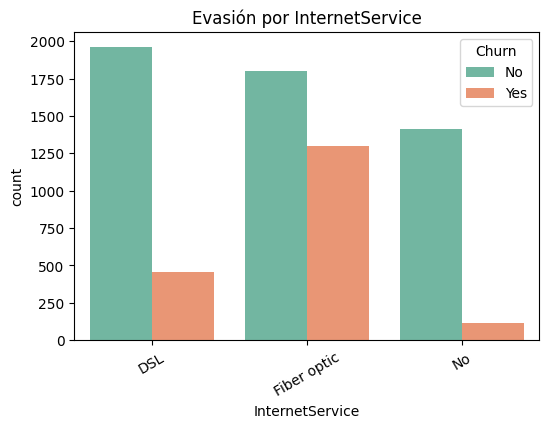

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_5512\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


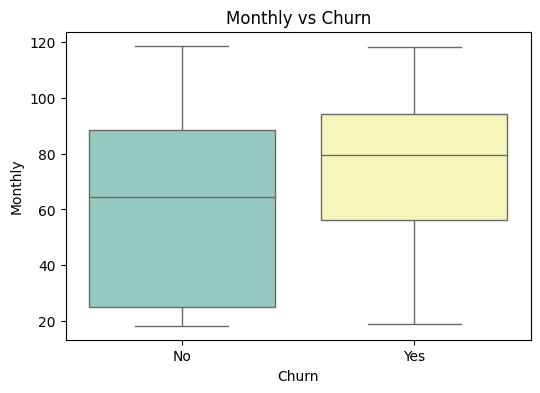

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_5512\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


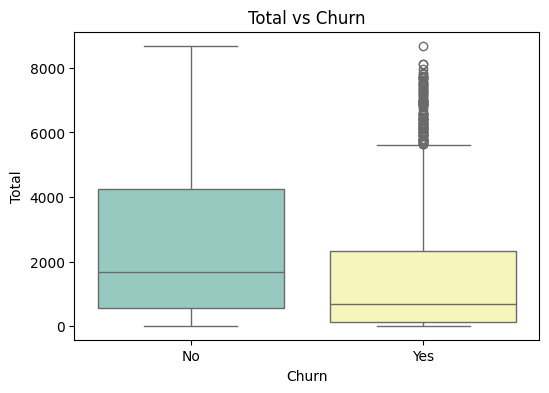

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_5512\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


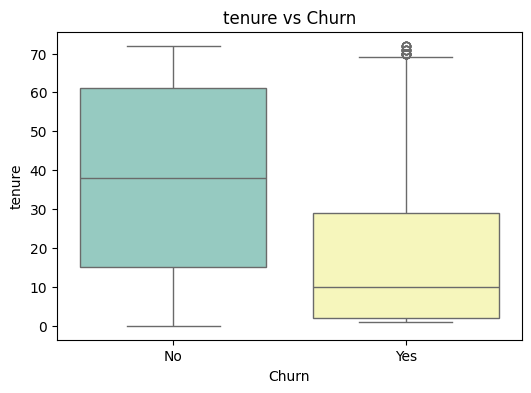

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_5512\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


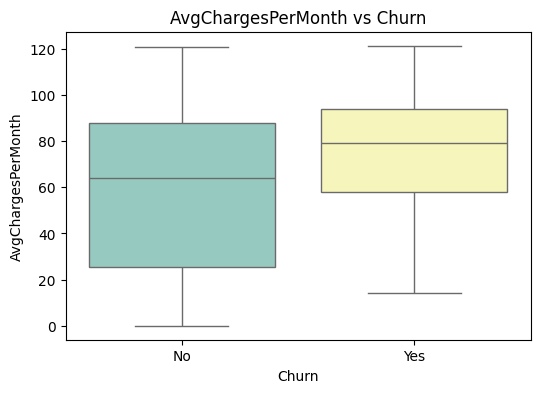

In [27]:
# 📊 Carga y análisis
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis descriptivo ---
print("\n📌 Métricas descriptivas:")
print(df.describe())

# Distribución de Churn
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Distribución de Churn")
plt.show()

# Relación Churn con variables categóricas
categoricas = ["gender", "Contract", "PaymentMethod", "InternetService"]
for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set2")
    plt.title(f"Evasión por {col}")
    plt.xticks(rotation=30)
    plt.show()

# Relación Churn con variables numéricas
numericas = ["Monthly", "Total", "tenure", "AvgChargesPerMonth"]
for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Churn")
    plt.show()


#📄Informe final

In [ ]:
# 📄 Informe Final

## Introducción
El objetivo del análisis es comprender los patrones asociados a la evasión de clientes (Churn) en TelecomX. Reducir la evasión es clave para retener clientes y optimizar ingresos.

## Limpieza y Tratamiento de Datos
- Se cargaron los datos desde un archivo JSON y se normalizaron las estructuras anidadas.
- Se renombraron columnas para facilitar el análisis.
- Se convirtieron tipos de datos numéricos.
- Se eliminaron filas sin información en la variable `Churn`.
- Se creó la columna `AvgChargesPerMonth`.

## Análisis Exploratorio
- **Distribución de Churn**: La mayoría de los clientes permanecen, pero un porcentaje significativo presenta evasión.
- **Variables categóricas**: Mayor evasión en contratos "Month-to-month" y pagos por "Electronic check".
- **Variables numéricas**: Clientes que se dieron de baja tienden a tener menor tiempo de permanencia y gasto total más bajo.

## Conclusiones e Insights
- Contratos a corto plazo están más asociados con evasión.
- Métodos de pago electrónicos muestran mayor riesgo de cancelación.
- Clientes con menor tenure son más propensos a cancelar.

## Recomendaciones
- Ofrecer incentivos para migrar a contratos anuales o bianuales.
- Revisar políticas y experiencia de pago electrónico.
- Programas de fidelización para clientes nuevos durante los primeros meses.